
Loan Eligibility Prediction Classification Project 




The dataset has already been uploaded into the notebook

In [ ]:
import pandas as pd
from sklearn import svm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
df0 = pd.read_csv('/content/sample_data/loan_data_set.csv')
df = df0.dropna()

In [ ]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y

In [ ]:
df.shape

(480, 13)

In [ ]:
df.drop(['Married', 'Gender', 'Property_Area', 'CoapplicantIncome', 'Education'], axis = 1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

Let's vizualise the data to see how helpful the parameter are for the prediction

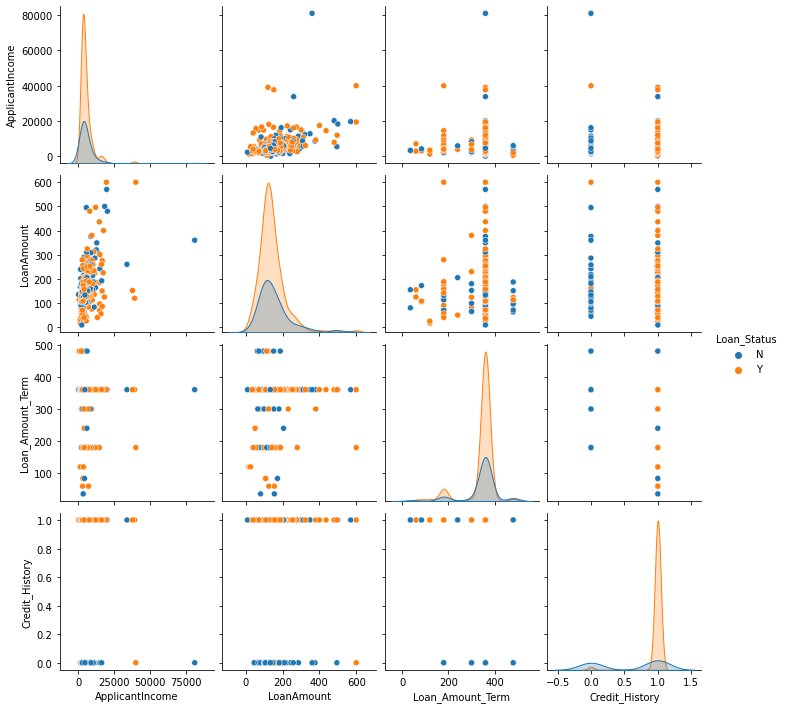

In [ ]:
sns.pairplot(df, hue='Loan_Status')

Looks like the best feature for classification is credit history

In [ ]:
Feature = df[['Credit_History']]

In [ ]:
X = Feature

In [ ]:
y = df['Loan_Status'].values
y[0:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X[0:5]

array([[0.41319694],
       [0.41319694],
       [0.41319694],
       [0.41319694],
       [0.41319694]])

We need to split our data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Now we define and train the model

In [ ]:
supportVectMac = svm.SVC(kernel='rbf')

In [ ]:
supportVectMac.fit(X_train, y_train)

SVC()

Let's see how good our model classify the data

In [ ]:
supportVectMac.score(X_test, y_test)

0.8333333333333334

It does well but let's check if adding more features can improve the performance

In [ ]:
Features = df[['Credit_History', 'LoanAmount', 'ApplicantIncome']]

In [ ]:
X = Features

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X[0:5]

array([[ 0.41319694, -0.20808917, -0.13796959],
       [ 0.41319694, -0.97900085, -0.4175358 ],
       [ 0.41319694, -0.30756164, -0.49118022],
       [ 0.41319694, -0.04644639,  0.11228014],
       [ 0.41319694,  1.52024509,  0.00931924]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
SVM = svm.SVC(kernel='rbf')

In [ ]:
SVM.fit(X_train, y_train)

SVC()

In [ ]:
SVM.score(X_test, y_test)

0.7666666666666667

As we can see, increasing the number of features does not make the model more accurate. Thus, we are sure that Credit History is the best feature to use